# **Problem statement 1**
#### **Consider the given dataset and apply various Data Preprocessing steps to make it fit for applying machine**
#### **learning algorithms.**
#### *[ Hint: Data Preprocessing, Feature Encoding, Feature Engineering, Feature Binning, Feature Scaling, Feature*
####    *Selection, Dimensionality Reduction, Data Visualization Techniques, Outlier Detection, Outlier Handling, Class*
####    *Imbalance ]*
#### **1. Prepare a neat documentation, expressing each and every step with reason. Also, specify the corresponding**
####      **code and its outcome.**
#### **2. Final dataset should be an efficient one and all the features should be of either “Int” or “Float” data type**
#### **3. Mention the target feature**

# **Importing Necessary Modules**

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from urllib.request import Request, urlopen
from sklearn import preprocessing
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.over_sampling import SMOTE,RandomOverSampler

# **Importing dataset and dictionary**

In [2]:
loan_dataset=pd.read_csv(r"C:\Users\PAYAL\Downloads\Machine_learning\lending-club-loans.csv",encoding=('ISO-8859-1'),
                         nrows=38299, low_memory=False)
dict_dataset=pd.read_csv(r"C:\Users\PAYAL\Downloads\Machine_learning\LCDataDictionary.csv",encoding=('ISO-8859-1'),
                         low_memory=False)

In [3]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN


In [4]:
dict_dataset.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


# **Data Preprocessing**

## **Handling duplicate values**
#### **Checking for the duplicate values in ID column of the dataset**

In [5]:
# checking for duplicate
any(loan_dataset['id'].duplicated())

False

#### **There are no duplicates present, so lets proceed further**

# **Handling NULL values**
#### **Checking the number of NULL values in rows and columns**

In [6]:
loan_dataset.isnull().sum(axis=0)   #columns

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                         0
tot_hi_cred_lim               38299
total_bal_ex_mort             38299
total_bc_limit                38299
total_il_high_credit_limit    38299
Length: 115, dtype: int64

In [7]:
loan_dataset.isnull().sum(axis=1)   #rows

0        58
1        57
2        59
3        56
4        55
         ..
38294    56
38295    56
38296    57
38297    56
38298    56
Length: 38299, dtype: int64

#### **NULL values exist in the dataset. So, we'll drop the columns which have more than half the values as NULL.**

In [8]:
#dropping null values
loan_dataset = loan_dataset.dropna(thresh=len(loan_dataset)/2, axis=1)
loan_dataset.isnull().sum(axis=1)

0        1
1        0
2        2
3        0
4        0
        ..
38294    0
38295    0
38296    0
38297    0
38298    0
Length: 38299, dtype: int64

# **Dropping redundant columns**

In [9]:
#getting column names
loan_dataset.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

#### **As we can see above, many of the columns are not useful for our purpose, so we can drop those as well.**

In [10]:
useless_columns = ['member_id', 'emp_title', 'emp_length', 'issue_d', 'url', 'desc', 'purpose', 'title', 'zip_code',
                   'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                   'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                   'earliest_cr_line', 'last_credit_pull_d']
loan_dataset = loan_dataset.drop(useless_columns, axis=1)

# **Fixing the datatypes**

In [11]:
loan_dataset.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                       bool
addr_state                     object
dti                           float64
delinq_2yrs                     int64
fico_range_low                  int64
fico_range_high                 int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
initial_list_status              bool
last_fico_ra

In [12]:
# utility function to check if a string can be parsed to integer or not
def is_int(num):
   try:
     int(num)
     return True
   except:
     return False

In [13]:
# dropping the rows where ID is not integer
loan_dataset = loan_dataset[loan_dataset['id'].apply(is_int)]

#### **The datatypes has been fixed as well**

## **Dropping columns with less number of unique values**

In [14]:
#dropping columns with less number of unique value
for col in loan_dataset.columns:
    if(len(loan_dataset[col].unique()) < 5):
        loan_dataset = loan_dataset.drop(col, axis=1)

## **Handling missing values in rows**
#### **To do this, we will replace null values with appropriate central tendency**

In [15]:
loan_dataset.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
int_rate                 object
installment             float64
grade                    object
sub_grade                object
annual_inc              float64
loan_status              object
addr_state               object
dti                     float64
delinq_2yrs               int64
fico_range_low            int64
fico_range_high           int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
last_fico_range_high      int64
last_fico_range_low       int64
dtype: object

#### **Here we have 3 datatypes.We can replace the null values in columns with datatype float64 and int64 with the mean value and for the columns with       object datatype with the mode**

In [16]:
float_columns = ['funded_amnt_inv', 'installment', 'annual_inc', 'dti','revol_util']
object_columns = ['int_rate', 'grade', 'sub_grade','loan_status', 'addr_state']
int_columns=['loan_amnt','funded_amnt','delinq_2yrs','fico_range_low','fico_range_high','inq_last_6mths',
             'open_acc','pub_rec','revol_bal','total_acc','last_fico_range_high','last_fico_range_low']
for col in float_columns:
     loan_dataset[col].fillna(loan_dataset[col].mean(), inplace=True)
for col in object_columns:
     loan_dataset[col].fillna(loan_dataset[col].mode(), inplace=True)
for col in int_columns:
     loan_dataset[col].fillna(loan_dataset[col].mean(), inplace=True)

In [17]:
loan_dataset.isnull().sum(axis=0)

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
int_rate                0
installment             0
grade                   0
sub_grade               0
annual_inc              0
loan_status             0
addr_state              0
dti                     0
delinq_2yrs             0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
dtype: int64

# **Data Visualization**

In [18]:
#to avoid unnecessary warning
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

##### **Loan amount distribution**

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(loan_dataset['loan_amnt'], kde=True)
plt.xlabel('Loan Amount (USD)')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts', fontsize = 20, weight='bold')

##### **Loan amount distribution as per status**

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=loan_dataset, x=loan_dataset.loan_status)
plt.xticks(rotation=90)
plt.xlabel('Status of Loan')
plt.ylabel('Loan Amount (USD)')
plt.title('Distribution of Loan Amounts by Loan Status')

#### **Most of the Loans are either Fully Paid or Charged off . Lets visualize them for better understanding**

In [ ]:
selected_loan_status = ['Fully Paid', 'Charged Off']
loan_dataset_copy = loan_dataset[loan_dataset.loan_status.isin(selected_loan_status)]
# creating a copy of dataset with fewer loan status
loan_dataset['int_rate'].replace('\%', '', regex=True, inplace=True)
loan_dataset['int_rate'] = loan_dataset['int_rate'].astype('float')

##### **Interest rate distribution**

In [ ]:
plt.figure(figsize = (15,8))
sns.histplot(x=loan_dataset_copy.int_rate,kde=True)
plt.title('Interest Rate Distribution', fontsize = 20, weight='bold')
plt.xlabel('Interest Rate', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

##### **Grade**

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x=loan_dataset_copy.sort_values(by='grade').grade, hue = loan_dataset_copy.loan_status)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Grade Distribution", fontsize = 20, weight='bold')
plt.xlabel("Grade", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

##### **From the chart above we see that as the grade is degrading, more loans are categorised as Charged Off than Fully Paid ,which is reasonable because lower grade means that the chances of defaulting are more.**

##### **Distribution of Loan Amount and Interest Rate by Loan Status**

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data=loan_dataset_copy, x='loan_status', y='loan_amnt')
plt.title('Distribution of Loan Amounts by Loan Status')
plt.xlabel('Status of Loan', fontsize = 15)
plt.ylabel('Loan Amount (USD)', fontsize = 15)
plt.title('Distribution of Loan Amounts by Loan Status', fontsize = 20, weight='bold')

##### **Fully Paid and Charged off has relatively the same loan amount, so nothing much can be said with this.**

# **Feature Encoding**
## **Handling categorical values**

In [ ]:
loan_dataset['grade'].value_counts()

In [ ]:
loan_dataset['sub_grade'].value_counts()

In [ ]:
loan_dataset['loan_status'].value_counts()

In [ ]:
loan_dataset['addr_state'].value_counts()

##### **So we can see that the above 4 columns have categorical values. So, we'll create a mapping dictionary for each.**

In [ ]:
mapping_dictionary_grade = {}
mapping_dictionary_sub_grade = {}
mapping_dictionary_loan_status = {}
mapping_dictionary_addr_state = {}
j=0
for i in list(dict(loan_dataset['grade'].value_counts()).keys()):
     mapping_dictionary_grade[i] = j
     j+=1
j=0
for i in list(dict(loan_dataset['sub_grade'].value_counts()).keys()):
    mapping_dictionary_sub_grade[i] = j
    j+=1
j=0
for i in list(dict(loan_dataset['loan_status'].value_counts()).keys()):
    mapping_dictionary_loan_status[i] = j
    j+=1
j=0
for i in list(dict(loan_dataset['addr_state'].value_counts()).keys()):
    mapping_dictionary_addr_state[i] = j
    j+=1

In [ ]:
loan_dataset.replace({ 'grade': mapping_dictionary_grade }, inplace=True)
loan_dataset.replace({ 'sub_grade': mapping_dictionary_sub_grade}, inplace=True)
loan_dataset.replace({ 'loan_status': mapping_dictionary_loan_status }, inplace=True)
loan_dataset.replace({ 'addr_state': mapping_dictionary_addr_state }, inplace=True)

In [ ]:
loan_dataset.head(10)

In [ ]:
loan_dataset.dtypes

##### **Now we have only numeric values in our dataset**

In [ ]:
unique_value = loan_dataset["loan_status"].nunique()
print(unique_value)

##### **Setting the target variable to be loan_status**

In [ ]:
t=['loan_status']
target_column = loan_dataset['loan_status']
loan_dataset = loan_dataset.drop(t, axis=1)

In [ ]:
loan_dataset.head()

# **Feature Engineering**
##### **Handling similar and null value columns**

In [ ]:
#null values
loan_dataset.isna().sum()

##### **Checking for the column with similar values**

In [ ]:
#similar values
for i in loan_dataset.columns:
   print(i , ":", loan_dataset.value_counts())
   print("-"*40)

##### **We drop columns with all rows with similar values and null values**

In [ ]:
loan_dataset = loan_dataset.drop(['pub_rec'], axis=1)

In [ ]:
loan_dataset.head()

#### **handle columns with less corelation to target column**
##### **combinig two columns into one**

In [ ]:
loan_dataset[['delinq_2yrs','grade']]

In [ ]:
loan_dataset['delinq_2yrs_grade']= loan_dataset['delinq_2yrs'] + loan_dataset['grade']
loan_dataset['delinq_2yrs_grade']

In [ ]:
loan_dataset.head()

### **Appying custom functions to make column easily interpretable by ml algorithms**
##### **Since we see that the maximum values are 0, we apply the following function**

In [ ]:
loan_dataset['revol_bal']

In [ ]:
def revol_bal(loan_dataset):
   if loan_dataset['revol_bal']> 0.0:
      return 1    #corresponds to enough balance
   else:
      return 0     #corresponds to zero balance
loan_dataset['revol_bal']= loan_dataset.apply(lambda loan_dataset:revol_bal(loan_dataset), axis=1)

In [ ]:
#checking the data
loan_dataset.head()

# **Feature Binning**
#### **Identify columns that can undergo binning**
##### **We will apply binning in columns with highly varied data values, in which the data is not directely related to the target column.**

In [ ]:
loan_dataset.head()

##### **Applying feature binning in annual_income**

In [ ]:
loan_dataset['annual_inc']

##### **Since, it has varied values, we perform binning using the following function:**

In [ ]:
def binningFunc(col, cut_points, labels=None):
  min_val= col.min()
  max_val= col.max()
  break_points= [min_val] + cut_points + [max_val]
  print (break_points)
  if not labels:
    labels= range(len(cut_points)+1)
  col_bin= pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
  return col_bin;

In [ ]:
cut_points=[60000, 300000]
labels=['low_inc','avg_inc','high_inc']
loan_dataset['annual_inc_binned'] = binningFunc(loan_dataset['annual_inc'], cut_points, labels)
loan_dataset.head(20)

##### **Applying feature binning in funded_amnt**

In [ ]:
loan_dataset['funded_amnt'].value_counts()

In [ ]:
cut_points=[1500, 10000]
labels=[0,1,2]
#these labels correspond to low, avg and high funded amounts.
loan_dataset['funded_amnt_binned'] = binningFunc(loan_dataset['funded_amnt'], cut_points, labels)
loan_dataset['funded_amnt_binned']=loan_dataset['funded_amnt_binned'].astype(int)
loan_dataset.head(20)

### **Drop columns that are now binned**
##### **Since we have revised the columns that were suitable for bining, we can now drop the original columns.**

In [ ]:
loan_dataset.drop(['funded_amnt', 'annual_inc'], axis=1,inplace=True)
loan_dataset.head()

##### **Now feature binning is done successfully**

# **Feature Scaling**

In [ ]:
loan_dataset.iloc[-1]

## **MinMaxScaler**
#### **MIN-MAX SCALER is used for "amount" features as there is a wide value distribution and each of them should contribute equally.This will give wrong          predictions if not scaled.It does not lead to range shrinkage maintaining balance.**

In [ ]:
#minmax-scaler
loan_dataset.columns = loan_dataset.columns.str.replace(' ', '')
min_max_scaler = preprocessing.MinMaxScaler()
loan_dataset[["loan_amnt"]] = min_max_scaler.fit_transform(loan_dataset[["loan_amnt"]])
loan_dataset.isnull().sum(axis=0)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
loan_dataset[["funded_amnt_inv","installment"]] = min_max_scaler.fit_transform(loan_dataset[["funded_amnt_inv","installment"]])
loan_dataset.isnull().sum(axis=0)

## **StandardScaler**
#### **StandardScaler is applied on "rate" and "range" features as there aren't drastic outliers that might affect scaling.It removes the mean and scales the data to unit variance.The scaling shrinks the range of the feature values to fit a bell curve.**

In [ ]:
#standard_scaler
Standardisation = preprocessing.StandardScaler()
loan_dataset[["int_rate","fico_range_low","fico_range_high","last_fico_range_high","last_fico_range_low"]] =
Standardisation.fit_transform(loan_dataset[["int_rate","fico_range_low","fico_range_high","last_fico_range_high",
                                               "last_fico_range_low"]])
loan_dataset.isnull().sum(axis=0)

In [ ]:
loan_dataset.head()

In [ ]:
loan_dataset.describe()

# **Feature Selection**

In [ ]:
loan_dataset.head()

##### **After Binning we have got a column(annual_inc_binned) which contains string values so we use one hot encoding to convert that one column to 3 columns.**

In [ ]:
bin_onehotenc = pd.get_dummies(loan_dataset['annual_inc_binned'])

In [ ]:
bin_onehotenc.drop(['avg_inc'],inplace=True,axis=1)

In [ ]:
bin_onehotenc.head()

##### **Merge the 2 datasets and drop the annual_incbinned column**

In [ ]:
loan_dataset = pd.concat([loan_dataset,bin_onehotenc],axis=1)
loan_dataset.drop(['annual_inc_binned'],inplace=True,axis=1)

# **Pearson Correlation**

In [ ]:
plt.figure(figsize=(22, 22))
pearson_corr=pd.DataFrame(loan_dataset.corr(method='pearson').abs())
pearson_heatmap=sns.heatmap(pearson_corr,vmin=0, vmax=1,annot=True)

##### **Since The Graph is symetric about diagonal we can reduce it to a lower triangular matrix.**
##### **Here use the absolute values for correlation as they are redundant as the positively correlated ones.**

In [ ]:
plt.figure(figsize=(22, 22))
pearson_corr=pd.DataFrame(loan_dataset.corr(method='pearson').abs())
pearson_heatmap=sns.heatmap(pearson_corr,vmin=0, vmax=1,annot=True,mask=np.triu(np.ones_like(pearson_corr,dtype=bool)))
pearson_heatmap.set_title('Pearson Correlation Heatmap')

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# **Spearman Correlation**

In [ ]:
plt.figure(figsize=(22, 22))
spearman_corr=pd.DataFrame(loan_dataset.corr(method='spearman').abs())
spearman_heatmap=sns.heatmap(spearman_corr,vmin=0, vmax=1,annot=True,mask=np.triu(np.ones_like(spearman_corr,dtype=bool)))
spearman_heatmap.set_title('Spearman Correlation Heatmap')

##### **Here we use spearman correlation values to remove columns as it is able to find the non linear relationships,yielding a much higher value of correlation,Moreover the correlation values of spearman and pearson are quitesimilar as columns having a linear correlation tend to also have some non linearity.**
##### **The Threshhold of correlation is set to 0.85 to remove highly correlated values corresponding to spearman correlation.**

In [68]:
def remove_cols(Correlation,thresh=0.85):
  cols=[]
  for i in Correlation.columns:
    for j in range(Correlation.columns.get_loc(i)):
        if Correlation[i][j]>=thresh:
           cols.append(i)
           print('removed {}'.format(i))
           break
  return cols

In [69]:
cols=remove_cols(spearman_corr)

removed funded_amnt_inv
removed installment
removed fico_range_high
removed last_fico_range_low
removed delinq_2yrs_grade
removed funded_amnt_binned


In [70]:
loan_dataset.drop(cols,axis=1,inplace=True)

Text(0.5, 1.0, 'Spearman Correlation Heatmap')

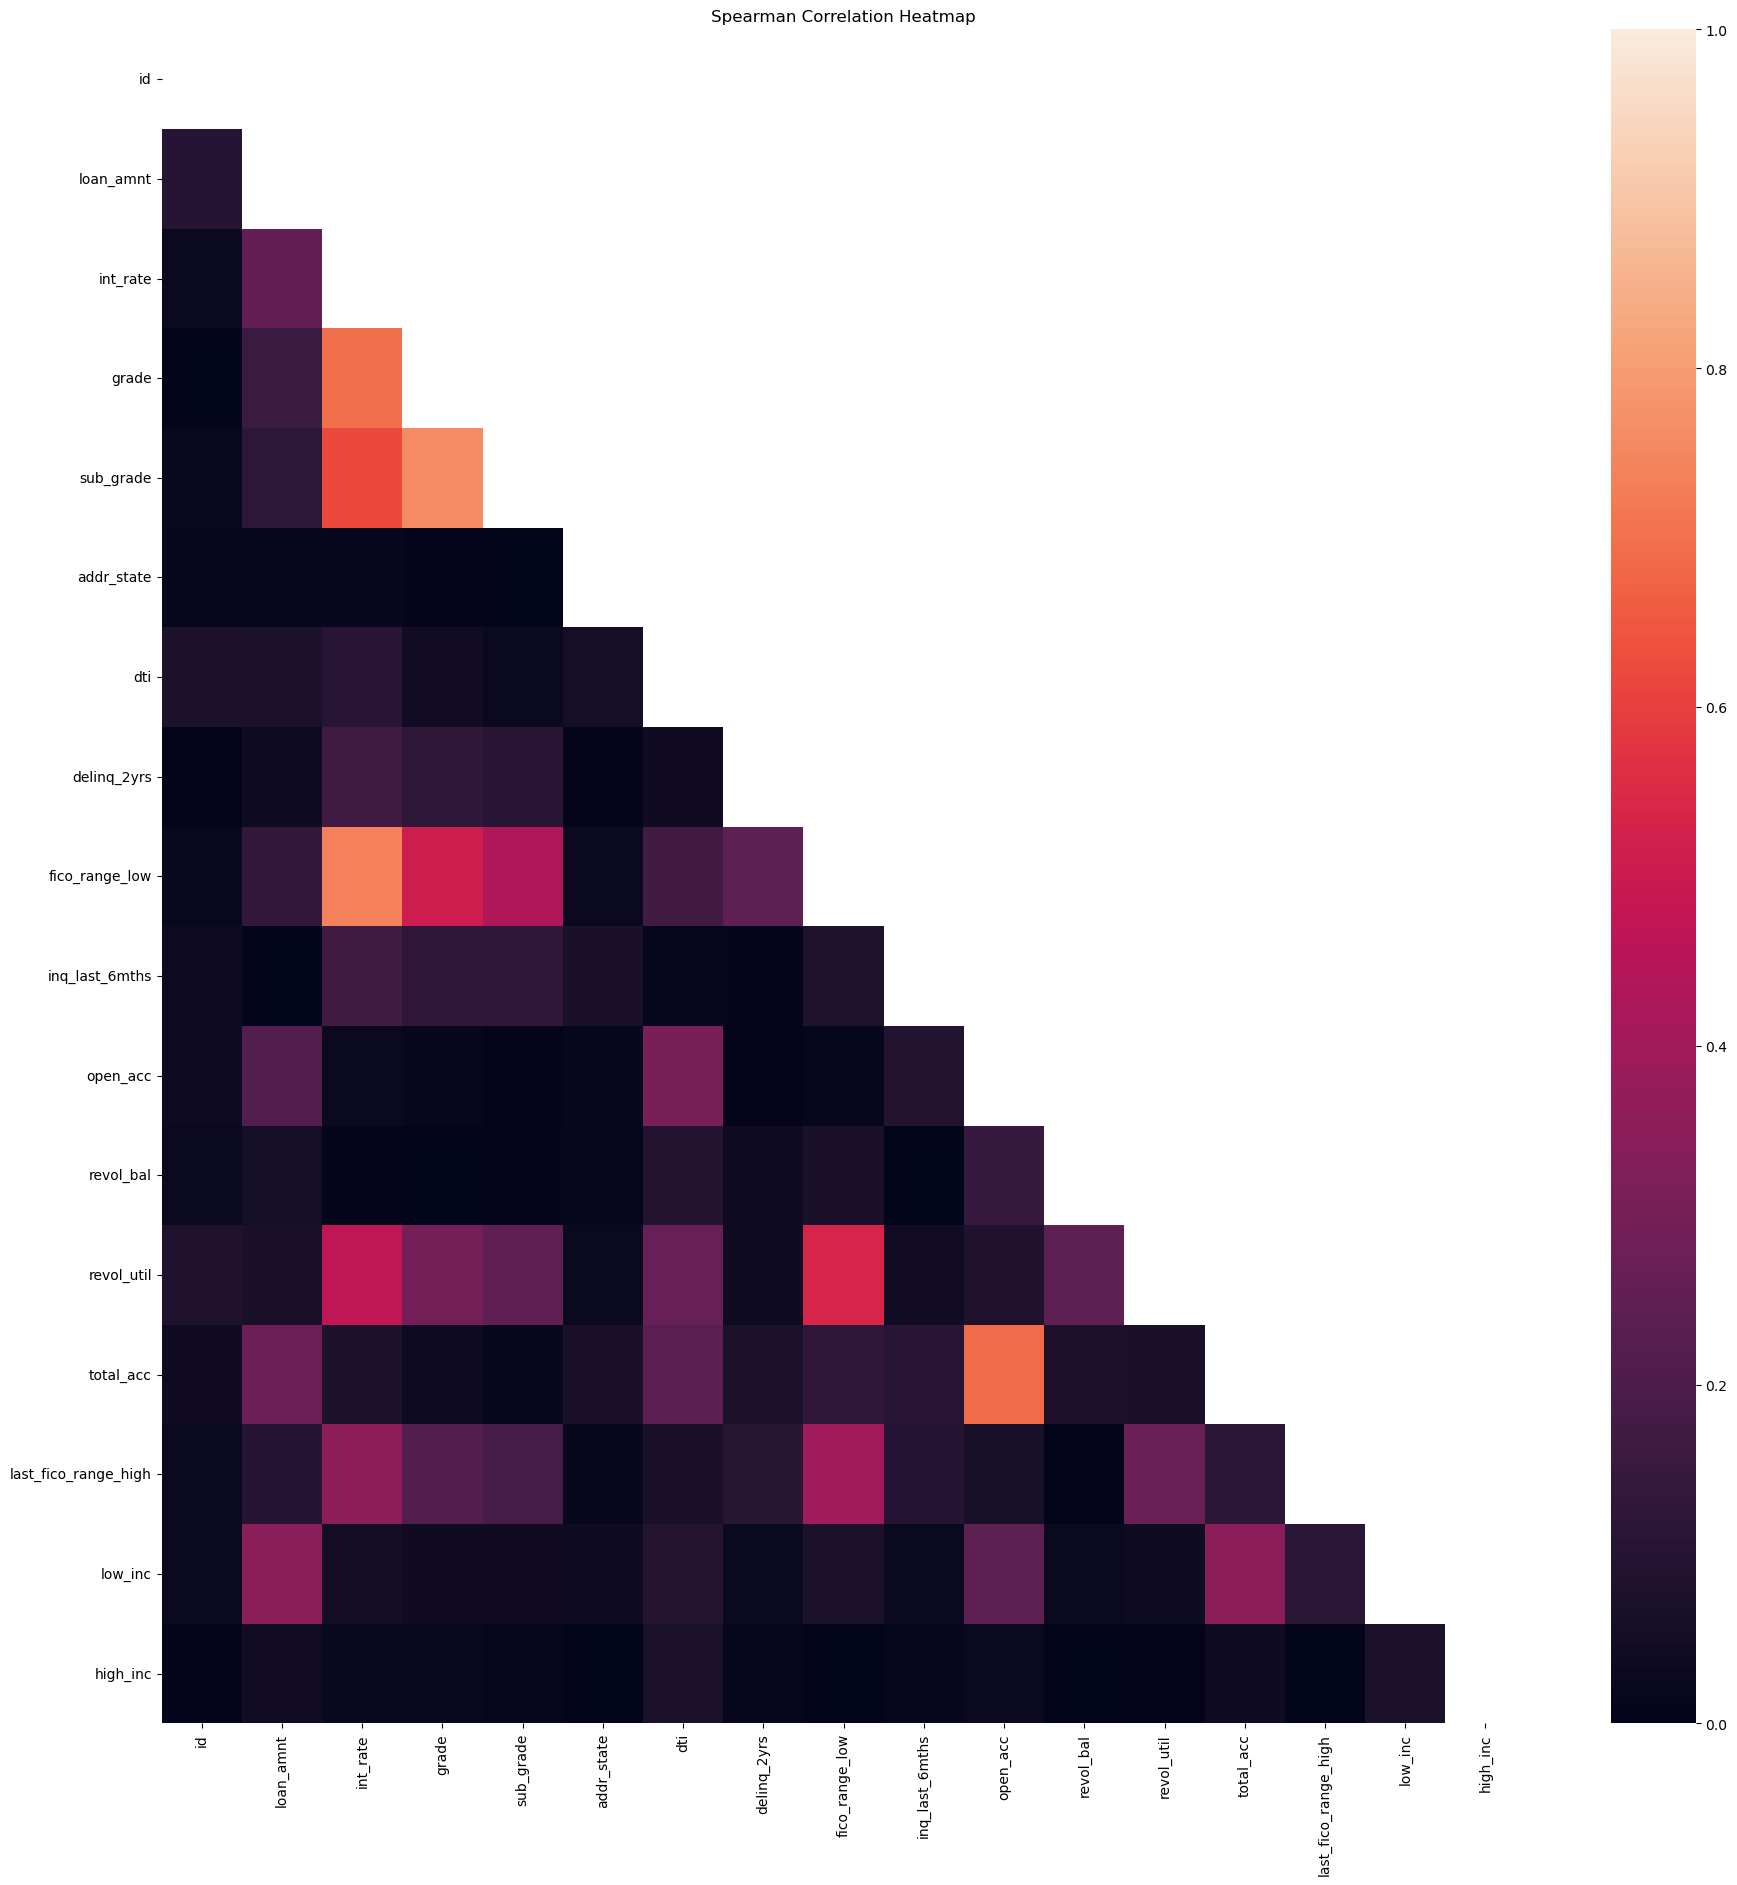

In [71]:
plt.figure(figsize=(22, 22))
spearman_corr=pd.DataFrame(loan_dataset.corr(method='spearman').abs())
spearman_heatmap=sns.heatmap(spearman_corr,vmin=0, vmax=1,annot=True,mask=np.triu(np.ones_like(spearman_corr,dtype=bool)))
spearman_heatmap.set_title('Spearman Correlation Heatmap')

# **Outliers**
## **Outliers Detection**

In [72]:
loan_dataset.drop(['id'],inplace=True,axis=1)

Boxplot of column loan_amnt before treatment:


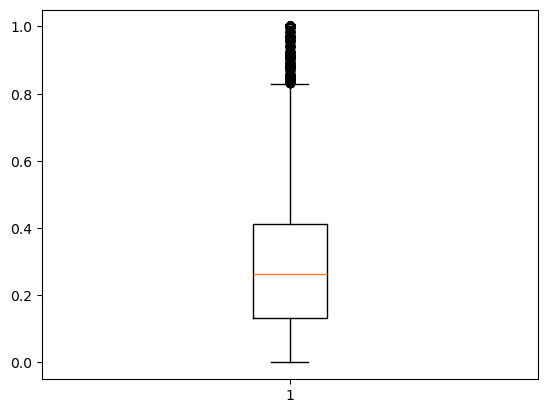

Boxplot of column int_rate before treatment:


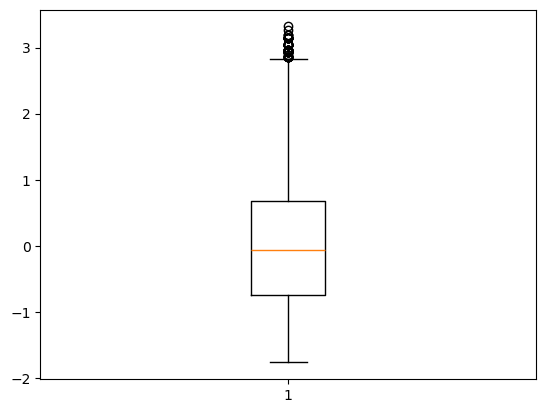

Boxplot of column grade before treatment:


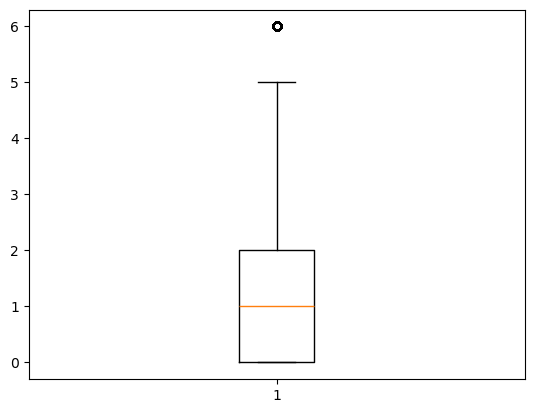

Boxplot of column sub_grade before treatment:


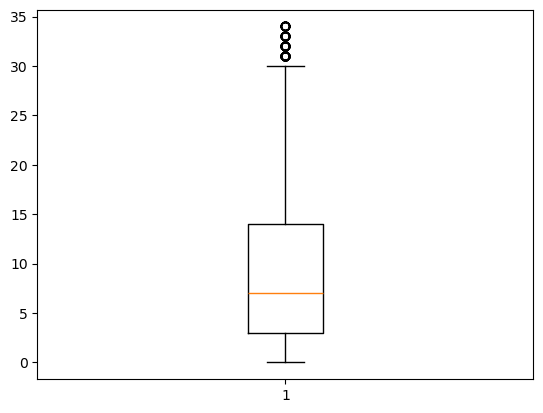

Boxplot of column addr_state before treatment:


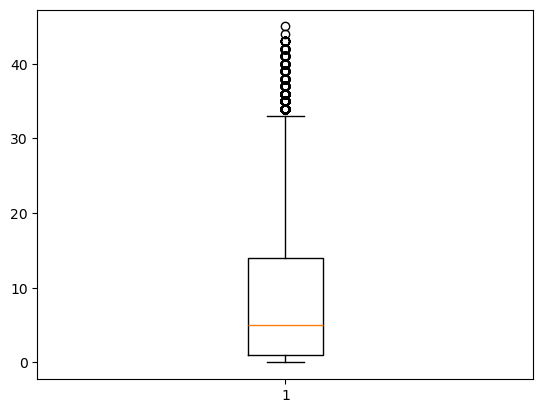

Boxplot of column dti before treatment:


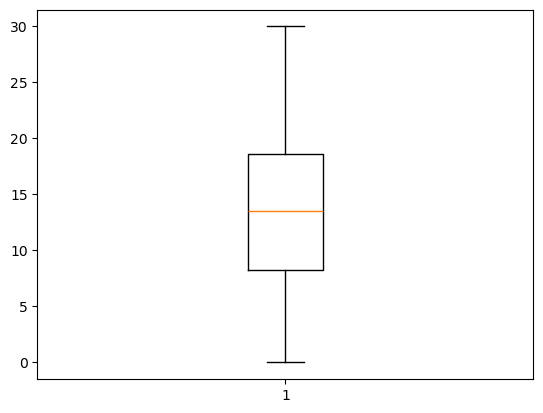

Boxplot of column delinq_2yrs before treatment:


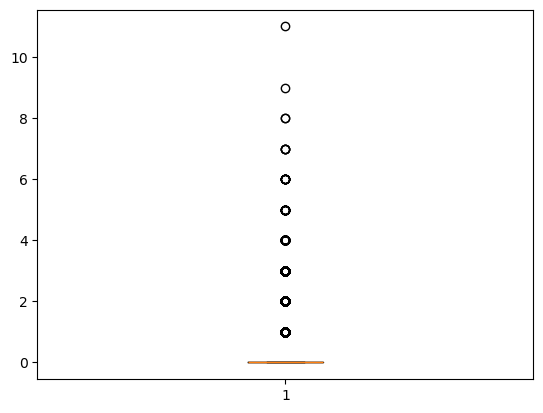

Boxplot of column fico_range_low before treatment:


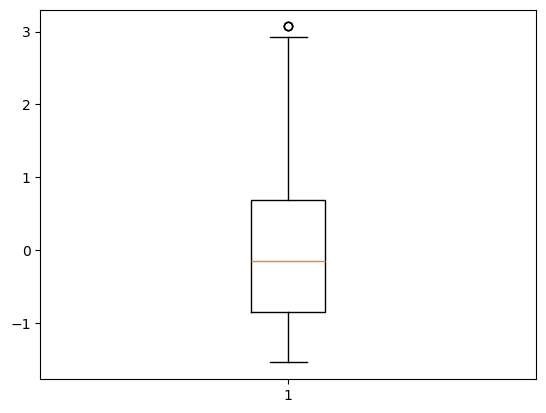

Boxplot of column inq_last_6mths before treatment:


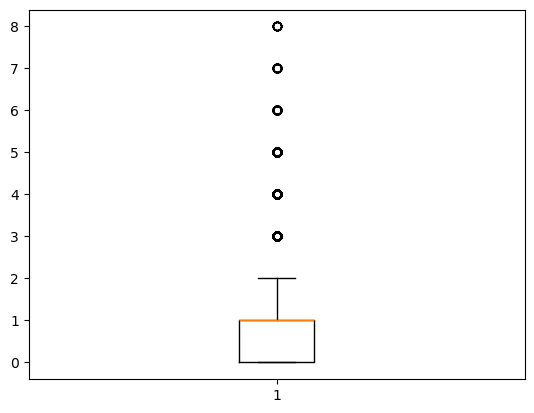

Boxplot of column open_acc before treatment:


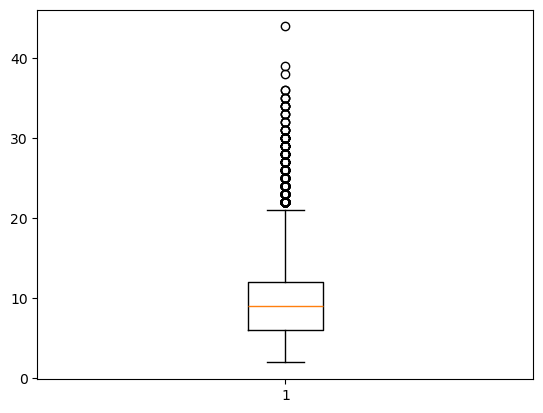

Boxplot of column revol_bal before treatment:


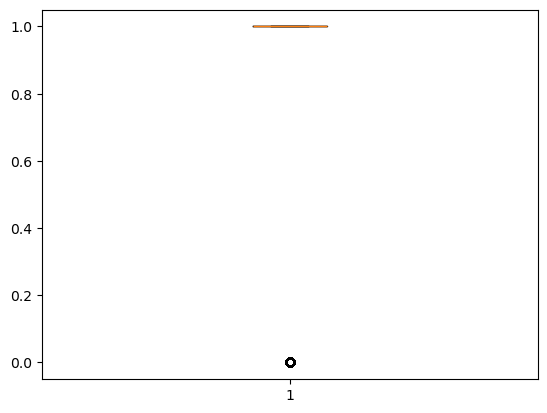

Boxplot of column revol_util before treatment:


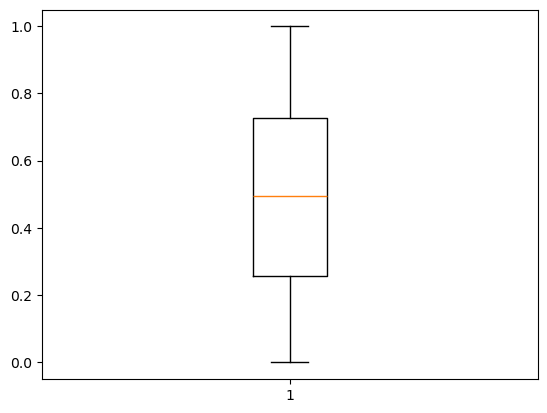

Boxplot of column total_acc before treatment:


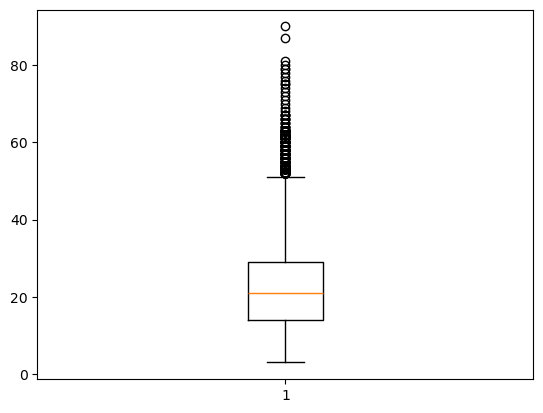

Boxplot of column last_fico_range_high before treatment:


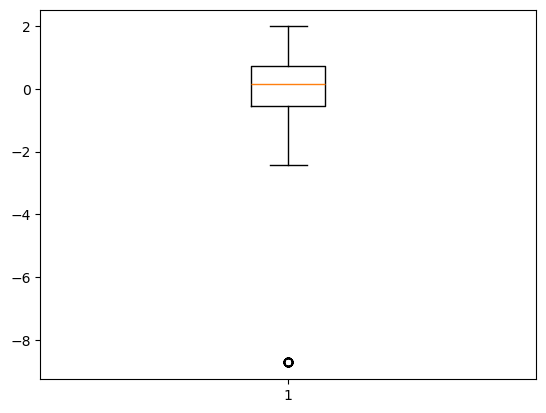

In [73]:
numeric_col=loan_dataset.select_dtypes(include=['number']).columns
for column in numeric_col:
    print("Boxplot of column "+column+" before treatment:")
    plt.boxplot(loan_dataset[column])
    plt.show()

##### **Box plots for each column are seen above. Now we need to do treatment for the columns with outliers.**

## **Outliers Handling**

In [74]:
# we are replacing outliers with median for treatment
def treatment(treatment_columns):
   for column in treatment_columns:
       #converting column to numeric type , coercing arrors to NaN
       loan_dataset[column]=pd.to_numeric(loan_dataset[column], errors='coerce')

       #removing missing values
       loan_dataset[column].fillna(loan_dataset[column].median(), inplace=True)

     #ensure the column contains only numeric values
       if loan_dataset[column].dtype!=np.number:
            print(f"Skipping treatment for column{column} as it contains non-numeric values.")
            continue

     #calculating quartiles and IQR
       Q1 = loan_dataset[column].quantile(0.25)
       median = loan_dataset[column].quantile(0.50)
       Q3 = loan_dataset[column].quantile(0.75)
       IQR = Q3 - Q1
       UL = Q3 + 1.5*(IQR)
       #Upper limit
       LL = Q1 - 1.5*(IQR)
       #Lower limit
       loan_dataset[column] = np.where(loan_dataset[column] > UL, median,loan_dataset[column])
       loan_dataset[column] = np.where(loan_dataset[column] < LL, median,loan_dataset[column])
def boxplots():
    numeric_col=loan_dataset.select_dtypes(include=['number']).columns
    for column in numeric_col:
       print("Boxplot of column "+column+" after treatment:")
       plt.boxplot(loan_dataset[column])
       plt.show()

Columns to be treated:
['int_rate', 'sub_grade', 'addr_state', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'last_fico_range_high', 'high_inc']
Skipping treatment for columnsub_grade as it contains non-numeric values.
Skipping treatment for columnaddr_state as it contains non-numeric values.
Skipping treatment for columndelinq_2yrs as it contains non-numeric values.
Skipping treatment for columninq_last_6mths as it contains non-numeric values.
Skipping treatment for columnopen_acc as it contains non-numeric values.
Skipping treatment for columnrevol_bal as it contains non-numeric values.
Skipping treatment for columntotal_acc as it contains non-numeric values.
Skipping treatment for columnhigh_inc as it contains non-numeric values.
Boxplot of column loan_amnt after treatment:


C:\Users\PAYAL\AppData\Local\Temp\ipykernel_10360\132151814.py:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if loan_dataset[column].dtype!=np.number:
C:\Users\PAYAL\AppData\Local\Temp\ipykernel_10360\132151814.py:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if loan_dataset[column].dtype!=np.number:
C:\Users\PAYAL\AppData\Local\Temp\ipykernel_10360\132151814.py:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if loan_dataset[column].dtype!=np.number:
C:\Users\PAYAL\AppData\Local\Temp\ipykernel_10360\132151814.py:11: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.


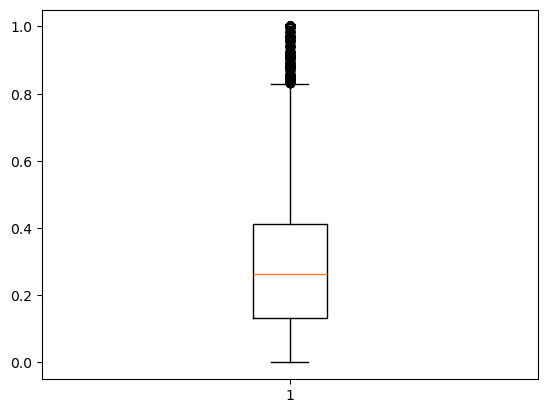

Boxplot of column int_rate after treatment:


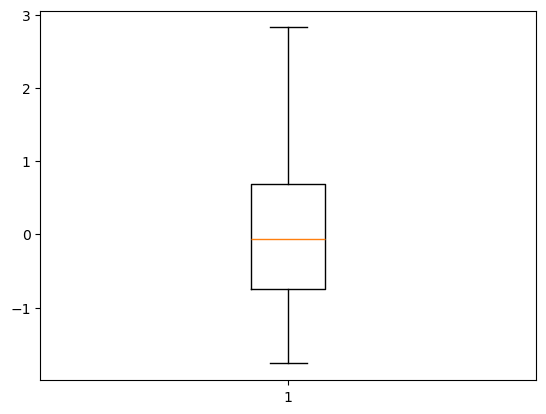

Boxplot of column grade after treatment:


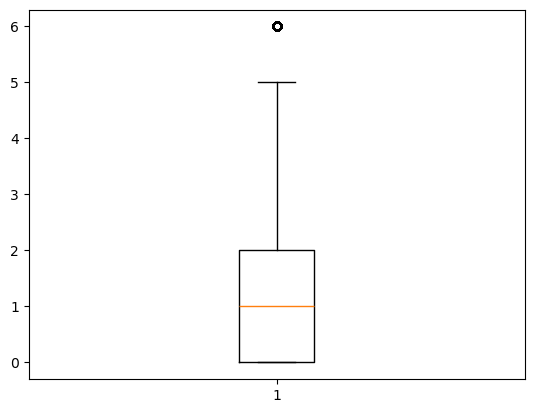

Boxplot of column sub_grade after treatment:


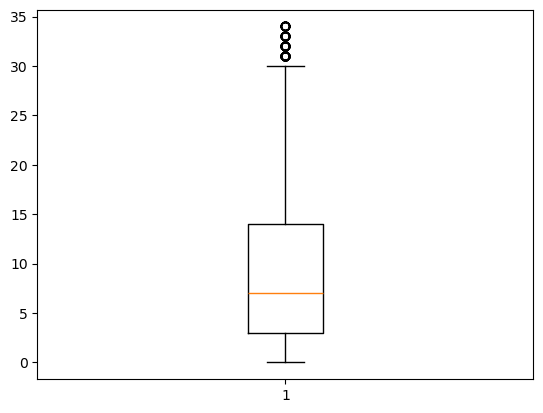

Boxplot of column addr_state after treatment:


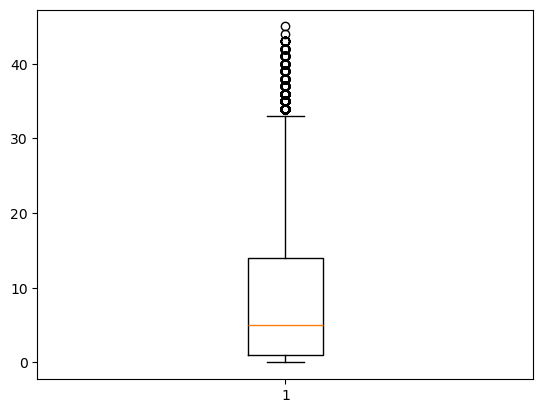

Boxplot of column dti after treatment:


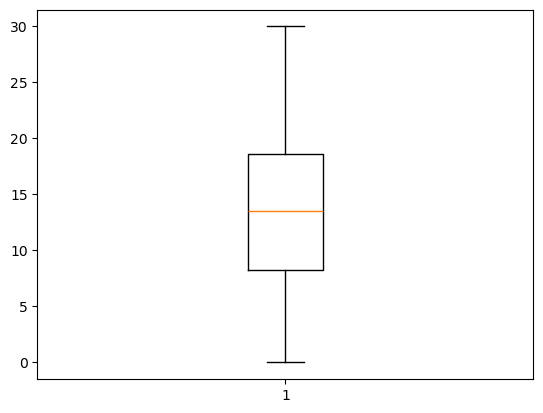

Boxplot of column delinq_2yrs after treatment:


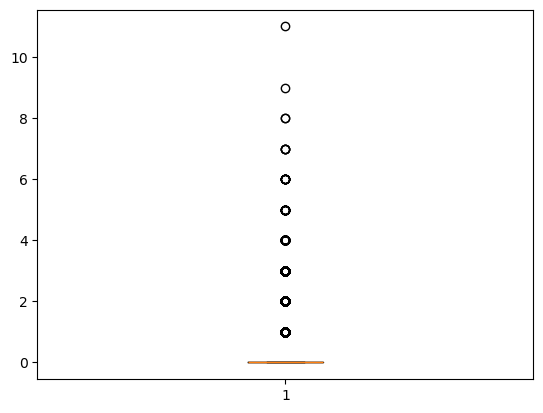

Boxplot of column fico_range_low after treatment:


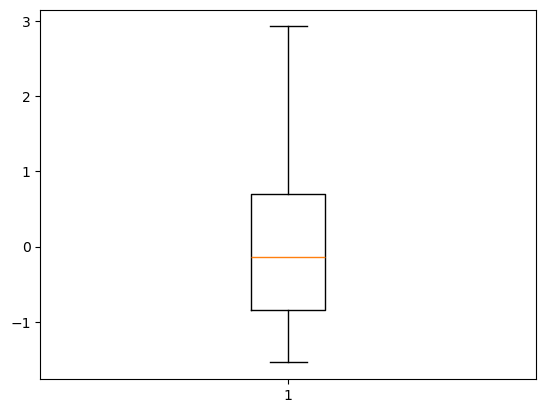

Boxplot of column inq_last_6mths after treatment:


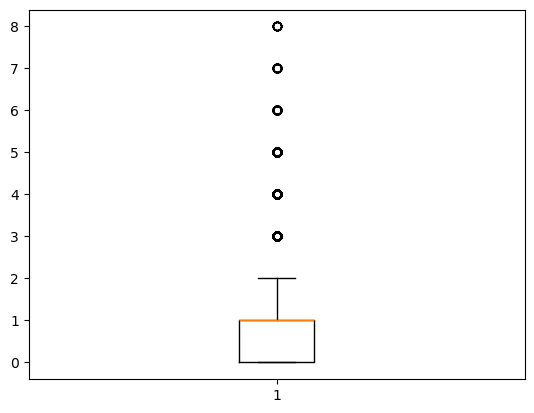

Boxplot of column open_acc after treatment:


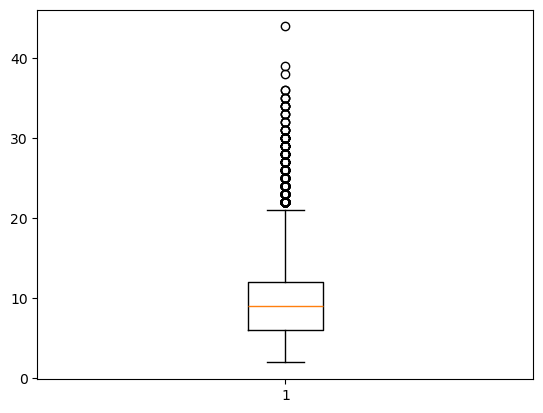

Boxplot of column revol_bal after treatment:


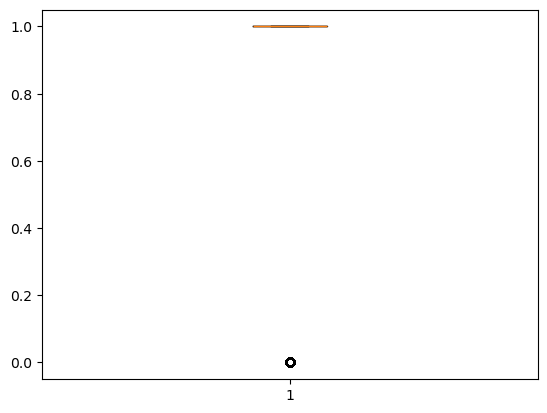

Boxplot of column revol_util after treatment:


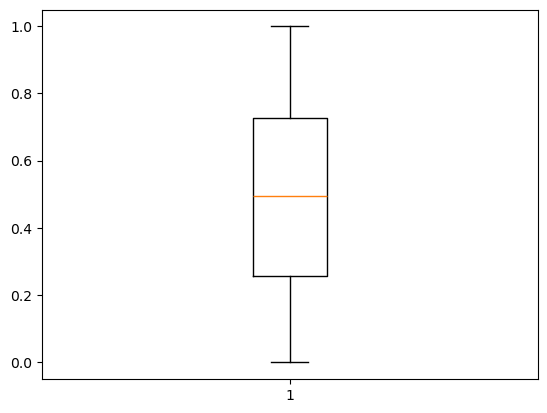

Boxplot of column total_acc after treatment:


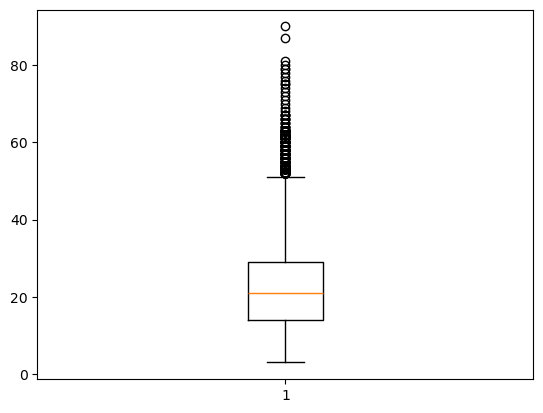

Boxplot of column last_fico_range_high after treatment:


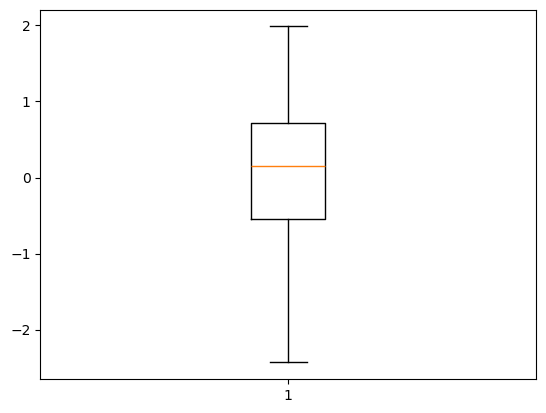

In [75]:
treatment_columns=['int_rate','sub_grade','addr_state','delinq_2yrs','fico_range_low','inq_last_6mths','open_acc','revol_bal',
                   'total_acc','last_fico_range_high','high_inc']
print("Columns to be treated:")
print(treatment_columns)
treatment(treatment_columns)
boxplots()

##### **Outliers are handled now.**

# **Dimensionality Reduction**

In [76]:
scaler = preprocessing.StandardScaler()
loan_dataset = pd.DataFrame(scaler.fit_transform(loan_dataset))

In [77]:
loan_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.841417,-0.375428,-1.071435,-0.420821,0.336365,2.139384,-0.295947,0.554281,0.129095,-1.436110,0.1594,1.224676,-1.155392,0.665865,0.925555,-0.066178
1,-1.174395,0.858133,0.327188,0.532608,-0.085737,-1.857179,-0.295947,0.694112,3.888951,-1.436110,0.1594,-1.402061,-1.593776,-2.520746,0.925555,-0.066178
2,-1.187714,1.042366,0.327188,0.941220,-0.296788,-0.699450,-0.295947,0.554281,1.069059,-1.664488,0.1594,1.747903,-1.067715,0.340700,0.925555,-0.066178
3,-0.175462,0.382865,0.327188,-0.557026,-0.929942,0.992153,-0.295947,-0.704196,0.129095,0.162534,0.1594,-0.991965,1.299556,-1.155056,0.925555,-0.066178
4,-1.107799,0.169261,-1.071435,-0.829434,1.602673,0.683225,-0.295947,-0.564365,-0.810869,1.304423,0.1594,0.171153,1.387233,0.015536,-1.080433,-0.066178


##### **Here we initalise PCA function with components=None to get as many axis as possible.**

In [78]:
pca=PCA(n_components=None)
loan_dataset= pd.DataFrame(pca.fit_transform(loan_dataset))

##### **Here we plot the graph of Pricipal component axis vs Variance ratio.**

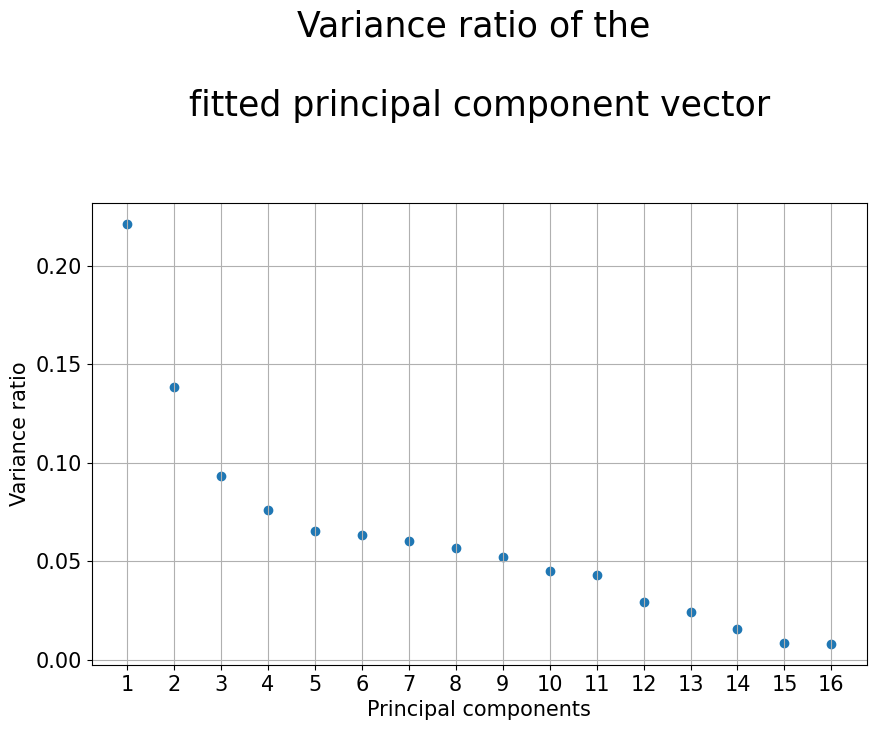

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],y=pca.explained_variance_ratio_)
plt.grid(True)
plt.title("Variance ratio of the \n\nfitted principal component vector\n\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Variance ratio",fontsize=15)
plt.show()

##### **Graph of number of pricipal components vs Cumulative sum of variance is plotted.**

Text(0, 0.5, 'cumulative variance')

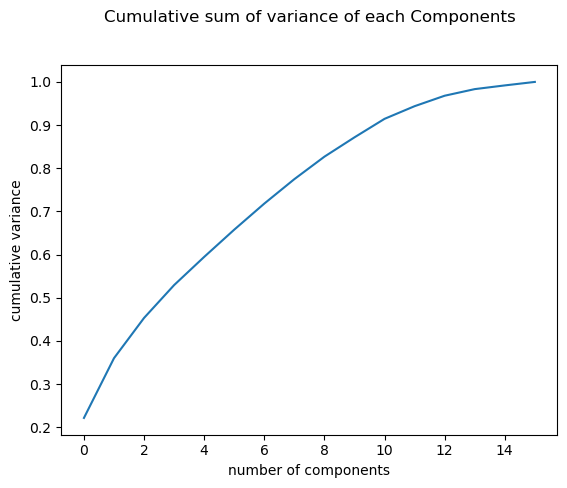

In [80]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative sum of variance of each Components\n\n")
plt.xlabel('number of components')
plt.ylabel('cumulative variance')

##### **Setting a threshold of 0.99 and removing remaining columns when the threshold is reached.**

In [81]:
sum=0
index=0
PCA_thresh=0.99
for i in pca.explained_variance_ratio_:
  if (sum<PCA_thresh):
    sum=sum+i
    index=index+1
print(index)
print(sum)
print(loan_dataset)

15
0.9919231088658769
             0         1         2         3         4         5         6   \
0     -0.765484 -1.589978 -1.883290 -0.592901 -0.918885  0.014281  0.393900   
1      0.481341 -2.622545  1.712340  2.341169 -1.400136  2.226124 -2.901367   
2      1.090463 -2.243356  0.300314 -0.482881 -0.799674  0.588919 -0.714492   
3      0.377917  0.354389 -1.070984  0.915586  0.490915 -0.128941 -1.107814   
4     -0.579962  1.450488 -1.708293  0.543731 -0.027652  0.197205  1.377560   
...         ...       ...       ...       ...       ...       ...       ...   
38294 -0.371063  1.176687  0.782210  1.768856  3.337276 -0.107972  1.281954   
38295  0.155678  1.562642  0.202800  5.593512  7.963793 -2.449122  4.248266   
38296 -1.895161 -0.881684 -0.050328 -0.225553 -0.577894  0.003851  0.931070   
38297  0.991045  1.702815 -0.654006  4.984083 -0.631743  0.289725  2.628745   
38298  2.558299 -1.476778  0.877510 -0.073010  0.001229  0.122756 -0.645289   

             7         8     

In [82]:
loan_dataset_reduced=loan_dataset.drop([i for i in range(index,len(pca.explained_variance_ratio_))],axis=1)

In [83]:
loan_dataset_reduced.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.765484,-1.589978,-1.883290,-0.592901,-0.918885,0.014281,0.393900,0.520154,-0.216845,1.922250,-0.067579,0.945096,0.365780,0.091688,-0.399275
1,0.481341,-2.622545,1.712340,2.341169,-1.400136,2.226124,-2.901367,-1.546596,0.388680,-0.400943,1.059553,0.505463,-0.125159,-0.080400,-0.069966
2,1.090463,-2.243356,0.300314,-0.482881,-0.799674,0.588919,-0.714492,-0.577811,-0.701820,0.773303,-0.733213,0.097879,1.436738,0.239884,-0.303894
3,0.377917,0.354389,-1.070984,0.915586,0.490915,-0.128941,-1.107814,0.810228,-0.103504,-0.474148,0.890012,-0.116328,-0.225345,-1.479193,0.506238
4,-0.579962,1.450488,-1.708293,0.543731,-0.027652,0.197205,1.377560,0.012164,0.927329,-0.890561,-1.366125,-0.149075,-0.536451,-0.475324,-0.232952


# **Class Imbalance**

In [84]:
X = loan_dataset_reduced
y = target_column       # For solving class imbalance
counter=Counter(target_column)
print('before',counter)
oversample = RandomOverSampler(random_state = 2)
X, target_column = oversample.fit_resample(X, target_column.ravel())
counter=Counter(target_column)
print('after',counter)  #from now on you should forget about X and y(target_column) have to use X_trainsm and y_trainsm for further purposes

before Counter({0: 32342, 1: 5410, 2: 513, 3: 16, 4: 12, 5: 5, 6: 1})
after Counter({0: 32342, 1: 32342, 2: 32342, 3: 32342, 4: 32342, 5: 32342, 6: 32342})


##### **Thus class imbalance issue has been solved**

# **Problem Statement 2**
#### **Create Decision Tree Algorithm with hyperparameter tuning (visualize the tree after construction).**
#### **Calculate the following evaluation metrics → Accuracy, Precision, Recall, F1 Score, Confusion Matrix and discuss what you observe.**

#### **Dataset used-Iris** 
# **Importing Necessary Modules**

In [85]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# **Importing Dataset**

In [86]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

## **Splitting dataset into traing and testing sets**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# **Creating a decision tree**
## **Creating decision tree classifier**

In [88]:
iris_classifier = DecisionTreeClassifier()

## **Define hyperparameters for tuning**

In [89]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

## **Perform GridSearchCV for hyperparameter tuning**

In [90]:
grid_search = GridSearchCV(estimator=iris_classifier, param_grid=param_grid, cv=6)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

## **Getting Best Parameters**

In [91]:
best_params = grid_search.best_params_

## **Training decision tree classifier with these parameters**

In [92]:
best_param_classifier = DecisionTreeClassifier(**best_params)
best_param_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10)

## **Predictions**

In [93]:
y_pred = best_param_classifier.predict(X_test)

## **Evaluation metrics**

In [94]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

## **Printing Evaluation Metrics**

In [95]:
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


## **Visualizing the decision tree**

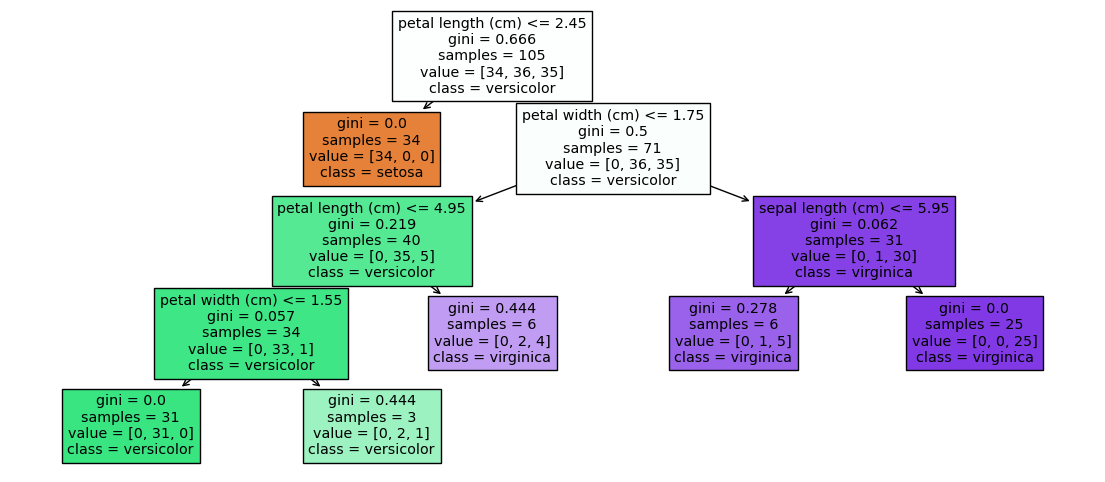

In [96]:
plt.figure(figsize=(14, 6))
plot_tree(best_param_classifier, feature_names=iris_dataset.feature_names, class_names=iris_dataset.target_names, filled=True)
plt.show()

#### **Converting class names array into a list**

In [97]:
class_names_list = list(iris_dataset.target_names)

## **Visualizing the decision tree**

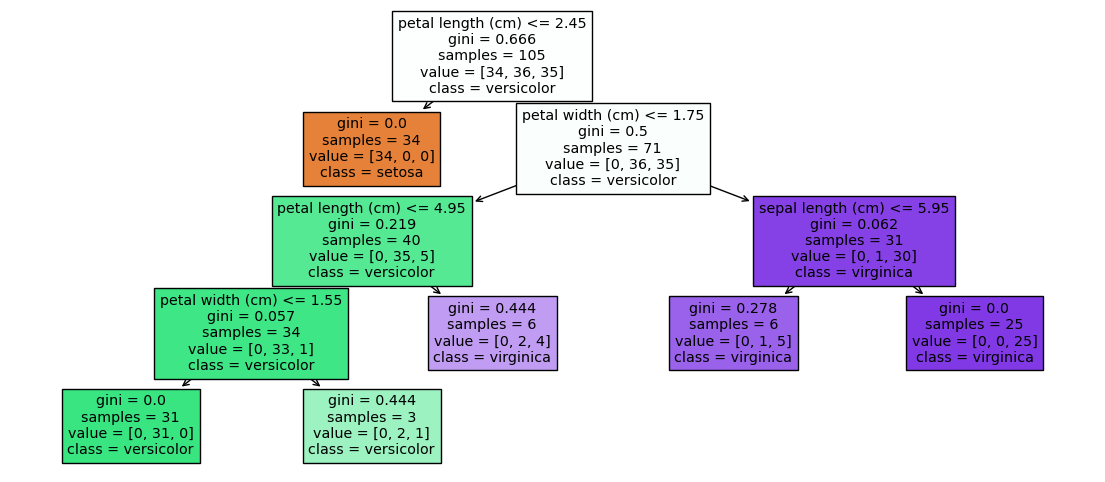

In [98]:
plt.figure(figsize=(14, 6))
plot_tree(best_param_classifier, feature_names=iris_dataset.feature_names, class_names=class_names_list, filled=True)
plt.show()